# Requirements
![requirements image](https://drive.google.com/uc?export=view&id=1_1WKwxVI-YE1BwaMFfYuzRIFxg2oOPuS)

# Our Questions:


* Do you receive financial aid?(What range of % does it cover your expenses)
* Do you receive aid via scholarship? (What range of % does it cover your expenses)
* How many hours / week do you work?
* How many hours per week do you work in a lab?
* How many jobs and internships have you applied for during your college career?





1. The Data that we have is from a survey from UCR Computer Science students. There are a broad range of questions ranging from GPA to class preference. 

2. We would like to know how GPA corresponds with finances, household styles and work hours / research experience.

3. We have multiple plots and analysis below.

4. We expect the highest GPA students to do the most research and have the most job experience. This is because their GPA likely impacts their likelihood of getting research and job experience in the first place.

5. We found that students with the highest GPA received the least financial aid but submitted the most job applications as well as had the most research experience. Students with the lowest GPA worked the most paid job hours and received the most financial aid. In the future, if we had access to how these same students performed 5 or 10 years out we would be able to use what we have with some predictive capability as to how well students will perform in the job market given how they spend their time, their research experience and their scholarship and financial aid support. There is a very high Chi squared value between each question and GPA, confirming a strong correlative link and rejecting the null hypothesis.

# Analysis

Get raw data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

import plotly.express as px
import pandas as pd

raw_df = pd.read_csv("data.csv")
data_df = pd.read_csv("data.csv")

In [6]:
raw_df

,Timestamp,To which gender identity do you most identify?,What year are you?,Are you a transfer student?,What is your current GPA?,What was your GPA in Fall 2021?,What was your GPA in Spring 2021?,What is your current housing situation?,What was your housing situation in Fall 2021?,How do you commute to school?,...,I typically cram for exams.,My social media consumption increased during online school vs. person learning.,I use social media during class.,I feel like playing video games influenced my choice to pursue computer science.,My parents/relatives influenced my choice to pursue computer science.,I enjoy computer science more after taking theory related classes.,I enjoy computer science more after taking hardware related classes.,I enjoy computer science more after taking application related classes.,I enjoy computer science more after taking engineering electives.,I enjoy computer science more after participating in science related extracurriculars.
0,2/3/2022 23:12:58,Man,Fourth Year,No,3.50 to 4.00,3.50 to 4.00,3.50 to 4.00,"On-campus housing (Dorms, Glen Mor, etc.)","On-campus housing (Dorms, Glen Mor, etc.)",Walk,...,5.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,5.0
1,2/3/2022 23:13:15,Man,Third Year,Yes,3.50 to 4.00,3.50 to 4.00,3.50 to 4.00,"On-campus housing (Dorms, Glen Mor, etc.)","On-campus housing (Dorms, Glen Mor, etc.)",Walk,...,4.0,3.0,1.0,1.0,5.0,2.0,2.0,1.0,3.0,3.0
2,2/3/2022 23:13:33,Man,Fourth Year,No,3.50 to 4.00,3.00 to 3.49,3.00 to 3.49,"On-campus housing (Dorms, Glen Mor, etc.)","On-campus housing (Dorms, Glen Mor, etc.)",Walk,...,3.0,5.0,4.0,4.0,2.0,3.0,NaN,5.0,4.0,5.0
3,2/3/2022 23:21:29,Woman,Third Year,No,3.50 to 4.00,3.50 to 4.00,3.50 to 4.00,Living at home,Living at home,Car,...,2.0,2.0,2.0,3.0,1.0,2.0,2.0,5.0,1.0,4.0
4,2/3/2022 23:33:58,Man,Fourth Year,Yes,3.50 to 4.00,3.00 to 3.49,3.00 to 3.49,Living at home,Off-campus housing,Car,...,5.0,5.0,1.0,5.0,1.0,1.0,3.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2/10/2022 0:27:39,Man,Fourth Year,Yes,3.50 to 4.00,3.50 to 4.00,3.50 to 4.00,Off-campus housing,Off-campus housing,Bike,...,4.0,2.0,3.0,4.0,1.0,4.0,4.0,5.0,2.0,2.0
74,2/10/2022 10:19:07,Man,Fourth Year,No,3.50 to 4.00,3.50 to 4.00,3.50 to 4.00,"On-campus housing (Dorms, Glen Mor, etc.)","On-campus housing (Dorms, Glen Mor, etc.)",Walk,...,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0
75,2/10/2022 10:33:05,Man,Fifth Year or higher,Yes,3.00 to 3.49,3.00 to 3.49,3.00 to 3.49,Living at home,Living at home,Car,...,4.0,5.0,3.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0
76,2/10/2022 10:37:56,Man,Fifth Year or higher,Yes,3.00 to 3.49,3.00 to 3.49,3.00 to 3.49,Living at home,Living at home,Car,...,4.0,4.0,4.0,3.0,1.0,2.0,4.0,4.0,4.0,3.0


Create dataframe called df that has only the columns we need, and with shorter column aliases

In [7]:
questions = ['On average, how many hours do you work at a paid job per week?',
             'On average, how many hours do you work at a research lab per week? ',
             'On average, what percentage of school expenses does your scholarship cover? (Enter 0 if not applicable)',
             'On average, what percentage of school expenses does your financial aid cover? (Enter 0 if not applicable.)',
             'How many jobs and internships have you applied for during your college career?',
             'What is your current GPA? ']

aliases = ['Paid Job Hours',
           'Research Lab Hours',
           'Scholarship Percentage',
           'Finaid Percentage',
           'Num Applications',
           'GPA']

In [8]:
df = raw_df[questions]

#rename columns to aliases
for i in range(len(questions)):
  df = df.rename(columns={questions[i]: aliases[i]})

df


,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications,GPA
0,0.0,0.0,0.0,70.0,15.0,3.50 to 4.00
1,0.0,0.0,0.0,0.0,5.0,3.50 to 4.00
2,0.0,8.0,0.0,0.0,6.0,3.50 to 4.00
3,15.0,0.0,70.0,30.0,20.0,3.50 to 4.00
4,0.0,0.0,0.0,90.0,80.0,3.50 to 4.00
...,...,...,...,...,...,...
73,6.0,0.0,0.0,80.0,6.0,3.50 to 4.00
74,0.0,2.0,0.0,0.0,10.0,3.50 to 4.00
75,20.0,0.0,0.0,60.0,3.0,3.00 to 3.49
76,30.0,0.0,0.0,60.0,8.0,3.00 to 3.49


GPA Normalization

In [9]:
import numpy as np
gpagroup = df.groupby(["GPA"]).mean()

# gpagroup

# (data - np.min(data)) / (np.max(data) - np.min(data))
normalized_gpa= (gpagroup - np.min(gpagroup)) / (np.max(gpagroup) - np.min(gpagroup))
normalized_gpa

,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications
GPA,,,,,
2.50 to 2.99,1.000000,0.0,0.00000,1.000000,0.649273
3.00 to 3.49,0.374545,0.0,1.00000,0.339819,0.000000
3.50 to 4.00,0.000000,1.0,0.79543,0.000000,1.000000


# Data cleaning number 2

In [10]:
clean_df = data_df.drop(['Timestamp', 'To which gender identity do you most identify?',
       'What year are you?', 'Are you a transfer student?',
       'What is your current GPA? ',
       'What was your GPA in Fall 2021?',
       'What was your GPA in Spring 2021?',
       'What is your current housing situation?',
       'What was your housing situation in Fall 2021?',
       'How do you commute to school?',
       'What is your estimated average one-way commute time?',
       'Are you a first, middle, last, or only child?',
       'Are you currently dating/in a relationship?',
       'What is your estimated total annual household income?',
       'Do any of your relatives work in the tech industry?',
       'Did you take a computer science course prior to college?',
       'When did you take CS10B or its equivalent? (Check one box only) [Fall]',
       'When did you take CS10B or its equivalent? (Check one box only) [Winter]',
       'When did you take CS10B or its equivalent? (Check one box only) [Spring]',
       'When did you take CS10B or its equivalent? (Check one box only) [Summer]',
       'What grade did you get in CS10A or its equivalent?',
       'What grade did you get in CS10B or its equivalent?',
       'Have you considered switching majors?',
       'Have you ever had an internship?',
       'Do you think you’ve experienced imposter syndrome at some point in your college career?',
       'In Fall 2021, did you often study and/or work on assignments in groups?',
       'In Spring 2021, did you often study and/or work on assignments in groups?',
       'What is your learning style?',
       'Which of the following activities do you most prefer?',
       'Do you prefer animated movies/shows or live action?',
       'What genres do you typically like to watch? Rank up to three choices. [1st Choice]',
       'What genres do you typically like to watch? Rank up to three choices. [2nd Choice]',
       'What genres do you typically like to watch? Rank up to three choices. [3rd Choice]',
       'Which streaming service(s) do you tend to use the most? Select up to three streaming services.',
       'What is your preferred time to engage in your favorite hobby?',
       'Have you found a new hobby during the pandemic? ',
       'What type of music do u listen to when studying for CS theoretical classes? (ex: cs11, cs111, cs141, cs150)',
       'What type of music do u listen to when studying for CS applicational classes? (ex: cs10a, cs10b, cs10c, cs100)',
       'What type of music do u listen to when studying for CS hardware classes? (ex: cs061, cs161, cs120a, cs120b)',
       'Did you play video games as a kid?',
       'Which of the following services did you subscribe to during the pandemic?',
       'What class are you taking this quarter?',
       'How often do you attend the CS111 lectures?',
       'What is your current grade in CS111?',
       'Do you attend any CS111 office hours?',
       'Do you attend any CS111 study sessions?', 'How old are you?',
       'At what age were you introduced to computer science?',
       'At what age did you know you wanted to major in computer science?',
       'How many brothers do you have?', 'How many sisters do you have?',
       #'How many people do you currently live with?',
       'How many people did you live with in Fall 2021?',
       'How many people did you live with in Spring 2021?',
       #'On average, how many units do you take per quarter?',
       'On average, how many hours do you study per day?',
       'On average, how many hours are you on campus per day?',
       'On average, how many hours do you sleep per day?',
       'On average, how many hours of free time do you have per week?',
       'How many extracurriculars are you involved in this quarter?',
       'On average, how many hours do you watch movies/shows per week?',
       'On average, how many hours do you use social media per day?',
       #'On average, what percentage of school expenses does your financial aid cover? (Enter 0 if not applicable.)',
       #'On average, what percentage of school expenses does your scholarship cover? (Enter 0 if not applicable)',
       'How many jobs and internships have you applied for during your college career?',
       'How many did you get?',
       #'On average, how many hours do you work at a paid job per week?',
       #'On average, how many hours do you work at a research lab per week? ',
       'How many relationships have you been in?',
       'Visual materials (graphs, tables, pictures, etc.) help with my learning.',
       'Hands-on activities (worksheets, in-person labs, class assignments) help with my learning.',
       'Verbal activities (discussions, reading aloud, etc.) help with my learning.',
       'Social interactions are better in-person vs. online.',
       'Even though a hybrid option is available, I try to attend in-person classes whenever they are offered.',
       'I feel more productive when attending class in-person vs. online.',
       'I grasp course material better when attending class in-person vs. online.',
       'Overall, I prefer in-person vs. online.',
       'On my day off, I would rather wake up early to complete an assignment/responsibility instead of staying up late.',
       'I see assignments as learning opportunities rather than work that needs to be finished for a grade.',
       'I typically cram for exams.',
       'My social media consumption increased during online school vs. person learning.',
       'I use social media during class.',
       'I feel like playing video games influenced my choice to pursue computer science.',
       'My parents/relatives influenced my choice to pursue computer science.',
       'I enjoy computer science more after taking theory related classes.',
       'I enjoy computer science more after taking hardware related classes.',
       'I enjoy computer science more after taking application related classes.',
       'I enjoy computer science more after taking engineering electives. ',
       'I enjoy computer science more after participating in science related extracurriculars.'
             ], axis=1)



In [11]:
Rename_df = clean_df.rename(columns={
    'How many people do you currently live with?': 'Housesize',
    'On average, how many units do you take per quarter?': 'Unit per quarter',
    'On average, what percentage of school expenses does your financial aid cover? (Enter 0 if not applicable.)': 'Financial Aid',
    'On average, what percentage of school expenses does your scholarship cover? (Enter 0 if not applicable)': 'Scholarship',
    'On average, how many hours do you work at a paid job per week?': 'Hours per week, Jobs',
    'On average, how many hours do you work at a research lab per week? ': 'Hours per week, Research'
})

<AxesSubplot:xlabel='GPA'>

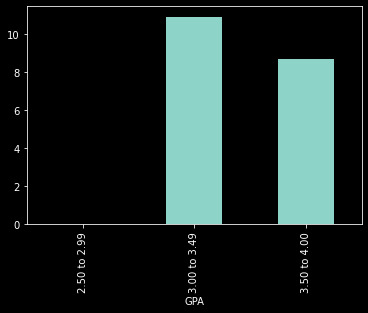

In [12]:
#Samarth
df3 = df.copy()
df3.groupby("GPA")["Scholarship Percentage"].mean().plot.bar()

# Graph 1

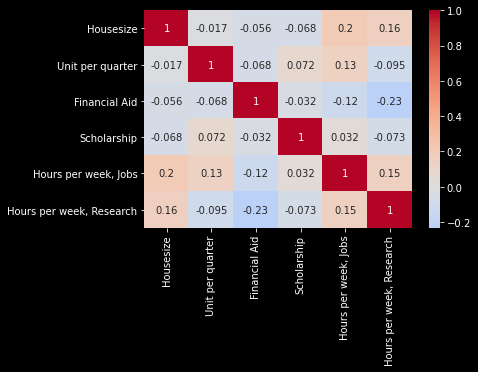

In [13]:
# From schen267
# get pairwise correlation of columns of the whole dataframe
r = Rename_df.corr()
r
import seaborn as sns
#use for divergining data center at 0
sns.heatmap(r,center=0,cmap = "coolwarm",annot= True)
plt.show()

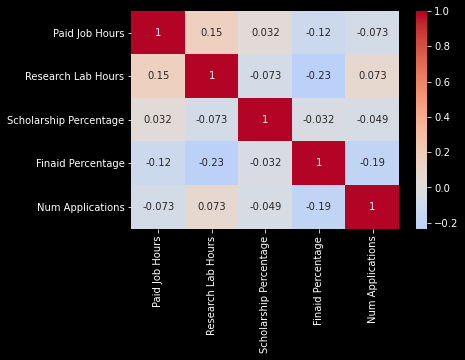

In [14]:
# Samarth Version
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

r = df.corr()
r
import seaborn as sns
#use for divergining data center at 0
sns.heatmap(r,center=0,cmap = "coolwarm",annot= True)
plt.show()

# Chi Squared Analysis

In [15]:
from scipy.stats import chi2_contingency
chi, p, dfree, expected = chi2_contingency(Rename_df)
print("chi square value: " ,chi)
print("p value: ", p)
print("degree of freedom: ", dfree)
print("expected frequencies when all cases are is independent: ", expected)
from scipy.stats import chi2
print("for 1 degree of freedom, the chi-square valued needed to reject the hypothesis at the 0.001 significance level:")
chi2.ppf(0.999, 1)

chi square value:  nan
p value:  nan
degree of freedom:  385
expected frequencies when all cases are is independent:  [[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan 

10.827566170662733

In [16]:
#chi-squared test Sevi version
from scipy.stats import chi2_contingency

#source: https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/#:~:text=How%20to%20run%20Chi-
#Square%20Test%20in%20Python%201,%23%20Chi-square%20test%20of%20independence.%205%20Inference.%20

c, p, dof, expected = chi2_contingency(normalized_gpa)
p

0.6871807114404601

In [17]:
# import numpy as np
# gpagroup = df.groupby(["GPA"]).mean()

# # gpagroup

# # (data - np.min(data)) / (np.max(data) - np.min(data))
# normalized_gpa= (gpagroup - np.min(gpagroup)) / (np.max(gpagroup) - np.min(gpagroup))
# normalized_gpa

In [18]:
normalized_gpa.iloc[1]

Paid Job Hours            0.374545
Research Lab Hours        0.000000
Scholarship Percentage    1.000000
Finaid Percentage         0.339819
Num Applications          0.000000
Name: 3.00 to 3.49, dtype: float64

In [19]:
dataframes = []

for i in range(len(normalized_gpa)):
    gpa = normalized_gpa.iloc[i].to_frame()
    gpa.index.name = 'y'
    gpa.reset_index(inplace=True)
    gpa.columns.values[0] = "b"
    gpa.columns.values[1] = "a"
    dataframes.append(gpa)

In [20]:
dataframes

[                        b         a
 0          Paid Job Hours  1.000000
 1      Research Lab Hours  0.000000
 2  Scholarship Percentage  0.000000
 3       Finaid Percentage  1.000000
 4        Num Applications  0.649273,
                         b         a
 0          Paid Job Hours  0.374545
 1      Research Lab Hours  0.000000
 2  Scholarship Percentage  1.000000
 3       Finaid Percentage  0.339819
 4        Num Applications  0.000000,
                         b        a
 0          Paid Job Hours  0.00000
 1      Research Lab Hours  1.00000
 2  Scholarship Percentage  0.79543
 3       Finaid Percentage  0.00000
 4        Num Applications  1.00000]

# More Graphs

In [21]:
# fig = px.line_polar(dataframes[2],theta='b', r='a',  line_close=True)
# # fig = px.line_polar(dataframes[1],theta='b', r='a',  line_close=True)
# fig.data[0].line.color = 'rgb(255, 0, 0)'
# fig.update_traces(fill='toself')
# fig.show()

In [32]:
import plotly.graph_objects as go
fig = go.Figure()


# for x in range(len(dataframes)):
#     fig.add_trace(go.Scatterpolar(
#       r=dataframes[x]['a'],
#       theta=dataframes[x]['b'],
#       fill='toself',
#       name='Product A'
# ))

# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[0, 1]
#     )),
#   showlegend=False
# )

# fig.show()

print("lowest to highest, blue red green")

lowest to highest, blue red green


In [33]:
gpagroup = df.groupby(["GPA"]).mean()

In [34]:
dataframes = []

for i in range(len(gpagroup)):
    gpa2 = gpagroup.iloc[i].to_frame()
    gpa2.index.name = 'y'
    gpa2.reset_index(inplace=True)
    gpa2.columns.values[0] = "b"
    gpa2.columns.values[1] = "a"
    dataframes.append(gpa2)

In [35]:
dataframes

[                        b     a
 0          Paid Job Hours  10.0
 1      Research Lab Hours   0.0
 2  Scholarship Percentage   0.0
 3       Finaid Percentage  60.0
 4        Num Applications  40.0,
                         b          a
 0          Paid Job Hours   6.090909
 1      Research Lab Hours   0.000000
 2  Scholarship Percentage  10.909091
 3       Finaid Percentage  50.454545
 4        Num Applications  13.545455,
                         b          a
 0          Paid Job Hours   3.750000
 1      Research Lab Hours   0.491803
 2  Scholarship Percentage   8.677419
 3       Finaid Percentage  45.541148
 4        Num Applications  54.290323]

In [36]:
# normalized_df=(df-df.mean())/df.std()
gpagroup = (gpagroup-gpagroup.mean()) / gpagroup.std()
gpagroup


dataframes = []

for i in range(len(gpagroup)):
    gpa2 = gpagroup.iloc[i].to_frame()
    gpa2.index.name = 'y'
    gpa2.reset_index(inplace=True)
    gpa2.columns.values[0] = "b"
    gpa2.columns.values[1] = "a"
    dataframes.append(gpa2)

import plotly.graph_objects as go
fig = go.Figure()


for x in range(len(dataframes)):
    fig.add_trace(go.Scatterpolar(
      r=dataframes[x]['a'],
      theta=dataframes[x]['b'],
      fill='toself',
      name='Product A'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2]
    )),
  showlegend=False
)


fig.show()

print("lowest to highest, blue red green")

y,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications
GPA,,,,,
2.50 to 2.99,1.072442,-0.577350,-1.132851,1.088328,0.196138
3.00 to 3.49,-0.165545,-0.577350,0.760040,-0.210012,-1.083537
3.50 to 4.00,-0.906897,1.154701,0.372811,-0.878315,0.887399


lowest to highest, blue red green


# Graph 3?

<Figure size 1080x864 with 0 Axes>

<AxesSubplot:>

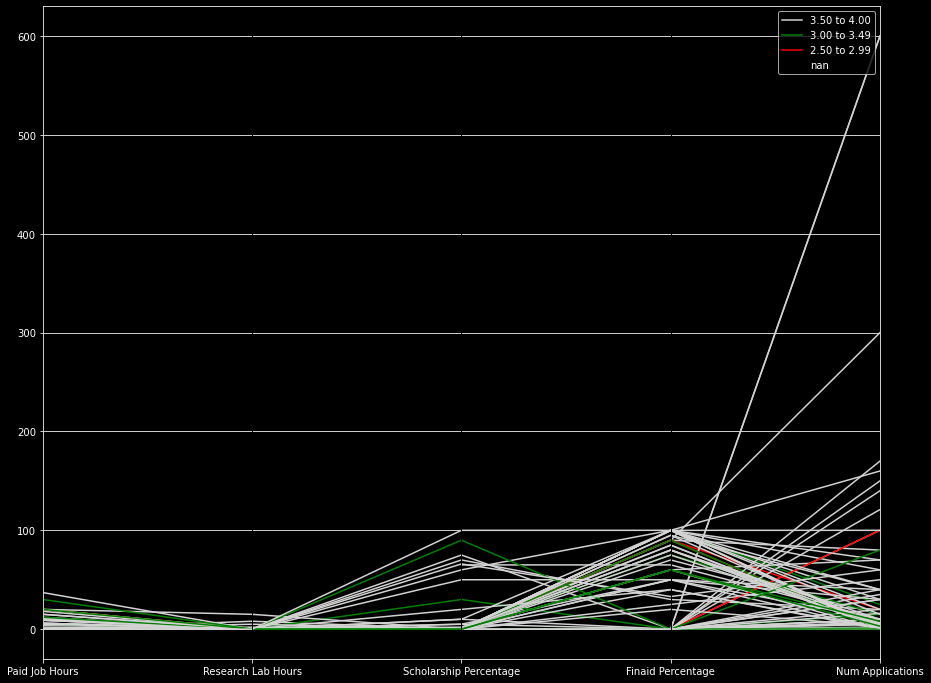

In [27]:
#Diego's Part

from pandas.plotting import parallel_coordinates

df4 = df[['Paid Job Hours',
           'Research Lab Hours',
           'Scholarship Percentage',
           'Finaid Percentage',
           'Num Applications',
           'GPA']]

plt.figure(figsize=(15,12))
parallel_coordinates(df4, 'GPA', color = ['lightgrey', 'green', 'red', 'black'])
plt.show()

In [28]:
# # Samarth Version
# from pandas.plotting import parallel_coordinates

# df4 = df[['Paid Job Hours',
#            'Research Lab Hours',
#            'Scholarship Percentage',
#            'Finaid Percentage',
#            'Num Applications',
#            'GPA']]

# plt.figure(figsize=(12,8))
# parallel_coordinates(df4, 'GPA', color = ['skyblue', 'green', 'red', 'black'])
# plt.show()

# Graph 4?

,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications
0,0.0,0.0,0.0,70.0,15.0
1,0.0,0.0,0.0,0.0,5.0
2,0.0,8.0,0.0,0.0,6.0
3,15.0,0.0,70.0,30.0,20.0
4,0.0,0.0,0.0,90.0,80.0
...,...,...,...,...,...
73,6.0,0.0,0.0,80.0,6.0
74,0.0,2.0,0.0,0.0,10.0
75,20.0,0.0,0.0,60.0,3.0
76,30.0,0.0,0.0,60.0,8.0


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

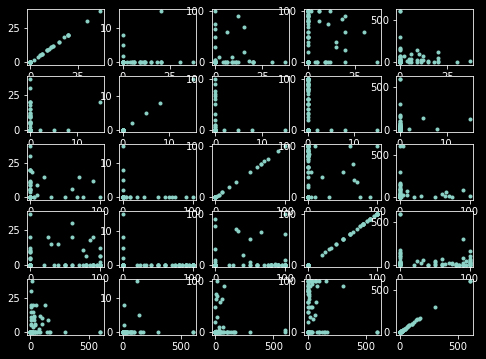

In [29]:
df2 = df.drop('GPA', axis=1)
display(df2)
figure(figsize=(8, 6))

i=0
for column in df2.columns:
  for column1 in df2.columns:
    i=i+1
    plt.subplot(5, 5, i)
    plt.plot(df2[column], df2[column1], '.');


array([[<AxesSubplot:xlabel='Paid Job Hours', ylabel='Paid Job Hours'>,
        <AxesSubplot:xlabel='Research Lab Hours', ylabel='Paid Job Hours'>,
        <AxesSubplot:xlabel='Scholarship Percentage', ylabel='Paid Job Hours'>,
        <AxesSubplot:xlabel='Finaid Percentage', ylabel='Paid Job Hours'>,
        <AxesSubplot:xlabel='Num Applications', ylabel='Paid Job Hours'>],
       [<AxesSubplot:xlabel='Paid Job Hours', ylabel='Research Lab Hours'>,
        <AxesSubplot:xlabel='Research Lab Hours', ylabel='Research Lab Hours'>,
        <AxesSubplot:xlabel='Scholarship Percentage', ylabel='Research Lab Hours'>,
        <AxesSubplot:xlabel='Finaid Percentage', ylabel='Research Lab Hours'>,
        <AxesSubplot:xlabel='Num Applications', ylabel='Research Lab Hours'>],
       [<AxesSubplot:xlabel='Paid Job Hours', ylabel='Scholarship Percentage'>,
        <AxesSubplot:xlabel='Research Lab Hours', ylabel='Scholarship Percentage'>,
        <AxesSubplot:xlabel='Scholarship Percentage', ylabel

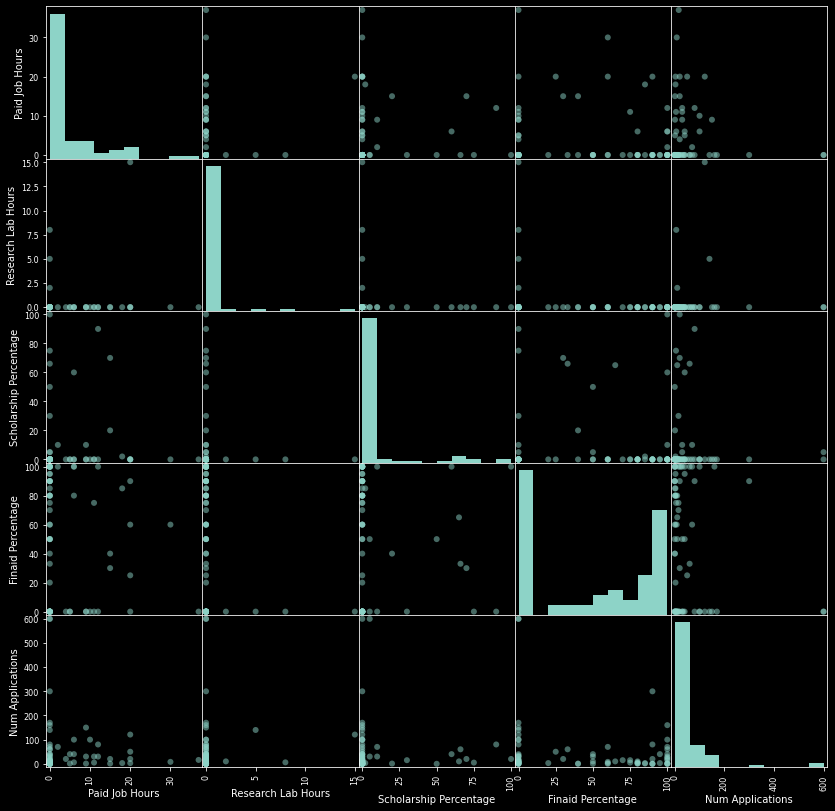

In [30]:
pd.plotting.scatter_matrix(df2, figsize=(14,14), marker='o')